## Initial imports

In [1]:
from scm.plams import *
from ase import Atoms
from ase.visualize.plot import plot_atoms

# Before running AMS jobs, you need to call init()
init()

PLAMS working folder: /home/hellstrom/adfhome/scripting/scm/plams/doc/source/examples/AMSCalculator/plams_workdir


## Example 1: Total system charge

### Create the charged molecule (ion)
Create a charged ion using using `ase.Atoms` and setting the `info` dictionairy.

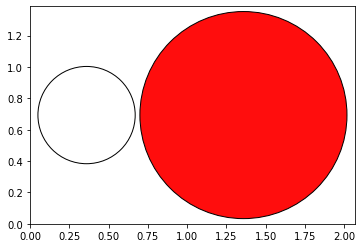

In [2]:
atoms = Atoms('OH',
              positions = [[1.0,0.0,0.0],[0.0,0.0,0.0]]
             )
#define a total charge
atoms.info['charge'] = -1

plot_atoms(atoms);

### Set the AMS settings

First, set the AMS settings as you normally would do in PLAMS:

In [3]:
settings = Settings()
settings.input.ADF #Use ADF with the default settings
settings.input.ams.Task = "SinglePoint"

### Run AMS through the ASE Calculator

Below, the ``amsworker=False`` (default) will cause AMS to run in standalone mode. This means that all input and output files will be stored on disk.

In [4]:
atoms.calc = AMSCalculator(settings = settings, name='total_charge', amsworker=False)

energy = atoms.get_potential_energy() #calculate the energy of a charged ion
print(f'Energy: {energy:.3f} eV') # ASE uses eV as energy unit

[18.04|09:39:55] JOB total_charge1 STARTED
[18.04|09:39:55] JOB total_charge1 RUNNING
[18.04|09:39:57] JOB total_charge1 FINISHED
[18.04|09:39:57] JOB total_charge1 SUCCESSFUL
Energy: -8.325 eV


### Access the input file

``atoms.calc.amsresults`` contains the corresponding PLAMS AMSResults object.

``atoms.calc.amsresults.job`` contains the corresponding PLAMS AMSJob object. This object has, for example, the ``get_input()`` method to access the input to AMS.

**Note**: These are actually properties of the Calculator, not the Atoms! So if you run more calculations with the same calculator you will **overwrite** the AMSResults in ``atoms.calc.amsresults``!

AMS used the following input:

In [5]:
print(atoms.calc.amsresults.job.get_input())

Task SinglePoint

system
  Atoms
              O       1.0000000000       0.0000000000       0.0000000000 
              H       0.0000000000       0.0000000000       0.0000000000 
  End
  Charge -1.0
End

Engine ADF
EndEngine




### Access the binary .rkf results files and use PLAMS AMSResults methods

Access the paths to the binary results files:

In [6]:
ams_rkf = atoms.calc.amsresults.rkfpath(file='ams')
print(ams_rkf)

/home/hellstrom/adfhome/scripting/scm/plams/doc/source/examples/AMSCalculator/plams_workdir/total_charge1/ams.rkf


If you prefer, you can use the PLAMS methods to access results like the energy:

In [7]:
energy2 = atoms.calc.amsresults.get_energy(unit='eV')
print(f'Energy: {energy2:.3f} eV')

Energy: -8.325 eV


## Example 2: Define atomic charges

### Construct a charged ion with atomic charges

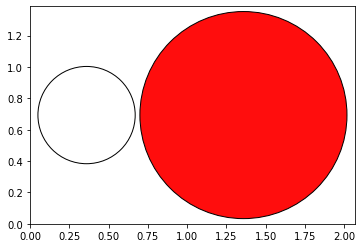

In [8]:
atoms = Atoms('OH',
              positions = [[1.0,0.0,0.0],[0.0,0.0,0.0]],
              charges = [-1, 0]
             )

plot_atoms(atoms);

### Run AMS 

In [9]:
calc = AMSCalculator(settings = settings, name='atomic_charges')
atoms.calc = calc

atoms.get_potential_energy() #calculate the energy of a charged ion

[18.04|09:39:58] JOB atomic_charges1 STARTED
[18.04|09:39:58] Job atomic_charges1 previously run as total_charge1, using old results
[18.04|09:39:58] JOB atomic_charges1 COPIED


-8.325219526830319

AMS only considers the total charge of the system and not the individual atomic charges. PLAMS thus reuses the results of the previous calculation since the calculation is for the same chemical system. Both input options are allowed. If both input options are used, the total charge is the sum of both.

In [10]:
print(calc.amsresults.job.get_input())

Task SinglePoint

system
  Atoms
              O       1.0000000000       0.0000000000       0.0000000000 
              H       0.0000000000       0.0000000000       0.0000000000 
  End
  Charge -1.0
End

Engine ADF
EndEngine




## Example 3: Set the charge in the AMS System block

### Set the charge in the AMS System block
A charge can be set for the calculator in the settings object. 

In [11]:
atoms = Atoms('OH',
              positions = [[1.0,0.0,0.0],[0.0,0.0,0.0]]
             )

settings = Settings()
settings.input.ADF #Use ADF with the default settings
settings.input.ams.Task = "SinglePoint"
settings.input.ams.System.Charge = -1

calc = AMSCalculator(settings = settings, name='default_charge')
atoms.calc = calc
atoms.get_potential_energy() #calculate the energy of a charged ion
print(calc.amsresults.job.get_input())

[18.04|09:39:58] JOB default_charge1 STARTED
[18.04|09:39:58] JOB default_charge1 RUNNING
[18.04|09:40:00] JOB default_charge1 FINISHED
[18.04|09:40:00] JOB default_charge1 SUCCESSFUL
System
  Atoms
              O       1.0000000000       0.0000000000       0.0000000000 
              H       0.0000000000       0.0000000000       0.0000000000 
  End
  Charge -1
End

Task SinglePoint

Engine ADF
EndEngine




In this case, the charge of the `Atoms` object is no longer used.

In [12]:
atoms = Atoms('OH',
              positions = [[1.0,0.0,0.0],[0.0,0.0,0.0]],
             )
atoms.info['charge'] = 100

settings = Settings()
settings.input.ADF #Use ADF with the default settings
settings.input.ams.Task = "SinglePoint"
settings.input.ams.System.Charge = -1

calc = AMSCalculator(settings = settings, name='default_charge_overridden')
atoms.calc = calc
atoms.get_potential_energy() #calculate the energy of a charged ion
print(calc.amsresults.job.get_input())

[18.04|09:40:00] JOB default_charge_overridden1 STARTED
[18.04|09:40:00] Job default_charge_overridden1 previously run as default_charge1, using old results
[18.04|09:40:00] JOB default_charge_overridden1 COPIED
System
  Atoms
              O       1.0000000000       0.0000000000       0.0000000000 
              H       0.0000000000       0.0000000000       0.0000000000 
  End
  Charge -1
End

Task SinglePoint

Engine ADF
EndEngine




## Finish PLAMS

In [13]:
finish()

[18.04|09:40:00] PLAMS run finished. Goodbye
